In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt
import pingouin as pg
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.api import qqplot

In [2]:
simple_df=pd.read_csv("data.csv")
print(simple_df)

            A          B
0   32.502345  31.707006
1   53.426804  68.777596
2   61.530358  62.562382
3   47.475640  71.546632
4   59.813208  87.230925
..        ...        ...
95  50.030174  81.536991
96  49.239765  72.111832
97  50.039576  85.232007
98  48.149859  66.224958
99  25.128485  53.454394

[100 rows x 2 columns]


In [3]:
simple_df.describe(include="all")

,A,B
count,100.000000,100.000000
mean,48.958341,72.735051
std,9.746379,16.658187
min,25.128485,31.707006
25%,41.526164,60.788586
50%,49.634970,72.179542
75%,56.762631,83.215080
max,70.346076,118.591217


In [4]:
print(simple_df["A"].corr(simple_df["B"]))

0.7737284998878238


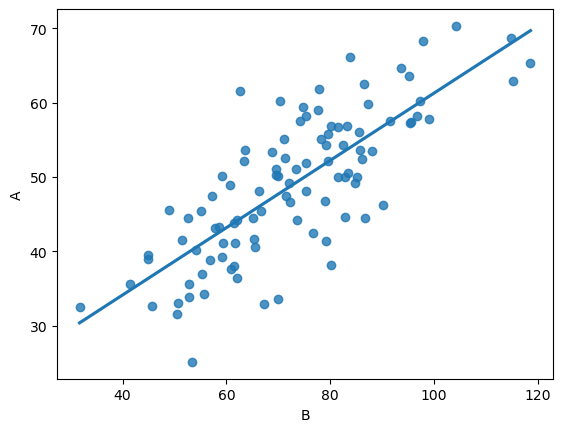

In [5]:
sns.regplot(ci=None,x="B",y="A",data=simple_df)
plt.show()

In [6]:
model=ols("A ~ B",data=simple_df)

In [7]:
model=model.fit()

In [8]:
print(model.params)

Intercept    16.031664
B             0.452693
dtype: float64


In [9]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      A   R-squared:                       0.599
Model:                            OLS   Adj. R-squared:                  0.595
Method:                 Least Squares   F-statistic:                     146.2
Date:                Thu, 05 Sep 2024   Prob (F-statistic):           3.86e-21
Time:                        12:01:38   Log-Likelihood:                -323.43
No. Observations:                 100   AIC:                             650.9
Df Residuals:                      98   BIC:                             656.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     16.0317      2.793      5.740      0.0

In [10]:
#t değeri 2 den büyük//kurtosis 3 artıklar normal dağılıma yakın// skew 0 //r2 0.8  yakın olması için aykırı değer tespiti (cook destance ile)

In [11]:
model.mse_resid
#modelin hata kareler ortalamasını (Mean Squared Error of residuals) verir. Bu, modelin verileri ne kadar iyi açıkladığını gösterir.

38.51347775979707

In [12]:
np.sqrt(model.mse_resid)
#bu hata kareler ortalamasının karekökünü alır, bu da modelin standart hata değerini verir. Düşük bir değer, modelin veriye iyi uyduğunu gösterir.

6.2059227967963855

In [13]:
C = pd.DataFrame({
    'B': np.random.choice(range(51, 160), size=100, replace=False)
})

In [14]:
print(C)

      B
0   158
1    82
2    75
3   152
4    63
..  ...
95  137
96  146
97   84
98   59
99   53

[100 rows x 1 columns]


In [15]:
simple_df["C"]=model.predict(C)
simple_df["D"]=C["B"]

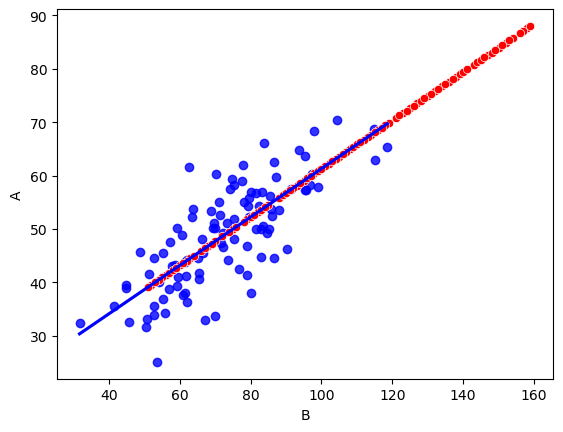

In [16]:
sns.regplot(ci=None,x="B",y="A",data=simple_df,color="blue")
sns.scatterplot(x="D",y="C",data=simple_df,color="red")
plt.show()

In [17]:
print(model.fittedvalues)

0     30.385217
1     47.166828
2     44.353242
3     48.420352
4     55.520528
        ...    
95    52.942922
96    48.676215
97    54.615631
98    46.011266
99    40.230116
Length: 100, dtype: float64


In [18]:
print(model.resid)

0      2.117129
1      6.259976
2     17.177116
3     -0.944713
4      4.292680
        ...    
95    -2.912747
96     0.563551
97    -4.576055
98     2.138593
99   -15.101631
Length: 100, dtype: float64


In [19]:
k=pd.DataFrame({"B":[21]})

In [20]:
deneme=model.predict(k)

In [21]:
print(deneme)

0    25.538226
dtype: float64


In [22]:
influence=model.get_influence()

In [23]:
#Cook's Distance, her bir gözlemin modelin parametrelerini ne kadar etkilediğini gösterir. 
#Yüksek Cook's Distance değeri, gözlemin model üzerindeki etkisinin yüksek olduğunu ve potansiyel bir aykırı değer olabileceğini gösteri
cooks_d, _ = influence.cooks_distance
print("Cook's distance:\n", cooks_d)

Cook's distance:
 [4.80842107e-03 5.49301916e-03 5.42167375e-02 1.18838862e-04
 4.37520131e-03 2.02090966e-03 2.50586655e-06 2.77562599e-03
 5.58743621e-04 2.40054959e-03 5.60953493e-03 1.73206004e-04
 7.13488936e-07 8.71511219e-03 2.49228493e-03 6.03159591e-03
 1.44428167e-02 1.48081240e-05 2.37563968e-02 2.26886565e-03
 2.88282442e-02 2.49095594e-02 7.72677247e-03 1.89206867e-03
 3.87791589e-04 1.21205026e-02 1.48141028e-03 7.82401278e-03
 3.92727897e-03 1.99134749e-03 9.92621180e-03 4.05499053e-04
 9.58864883e-03 1.20232498e-03 8.39747855e-03 8.16598524e-05
 1.64688509e-02 1.32048374e-02 1.12195602e-02 7.03410514e-03
 7.34692753e-03 1.38803048e-04 2.23727731e-03 2.05576880e-07
 3.11953617e-02 8.22141183e-03 3.73576174e-05 1.30691174e-03
 1.22162138e-02 1.40767865e-02 3.22207573e-02 1.61323385e-04
 4.12497806e-03 2.38648544e-03 4.36470802e-04 6.25939507e-03
 1.66919781e-02 1.20963982e-02 5.49922930e-03 7.18376151e-04
 1.48530431e-03 8.77715038e-04 1.53107312e-03 1.21432554e-02
 2.685

In [24]:
#Leverage, her bir gözlemin tahmin edilen değerler üzerinde ne kadar etkili olduğunu gösterir.
#Yüksek leverage değerleri, gözlemin tahmin edilen değerler üzerindeki etkisini gösterir.
leverage = influence.hat_matrix_diag
print("Leverage:\n", leverage)

Leverage:
 [0.07127326 0.01057009 0.01376686 0.01005141 0.01764889 0.01109172
 0.01173651 0.01669664 0.01024535 0.01007487 0.02123626 0.01345594
 0.01418789 0.01025713 0.01275589 0.0152517  0.0137556  0.03210862
 0.03077137 0.01915371 0.01452016 0.08654288 0.01872635 0.02658184
 0.01025478 0.01015008 0.02878997 0.02841853 0.01145271 0.01416519
 0.01320014 0.04571189 0.01054864 0.03102713 0.01006625 0.01137538
 0.01092223 0.02764269 0.01409807 0.01517621 0.02463618 0.01730393
 0.01376557 0.01465651 0.07577687 0.03686034 0.02266232 0.01847587
 0.02457418 0.02581063 0.01201016 0.01212099 0.01187275 0.01202259
 0.01001782 0.01009264 0.011476   0.01691757 0.01524838 0.01651291
 0.01444543 0.01030348 0.01650029 0.01675864 0.01029264 0.03827893
 0.01592947 0.02892524 0.01022444 0.02457966 0.02817056 0.01300947
 0.01000866 0.01810578 0.04616915 0.01704003 0.02279947 0.02115202
 0.01169079 0.03831012 0.01203253 0.01394293 0.02053411 0.01087367
 0.03520932 0.01148427 0.0103603  0.01037848 0.0100

In [25]:
# DFBETAs
#DFBETAs, her bir gözlemin regresyon katsayıları üzerindeki etkisini ölçer. 
#Yüksek DFBETA değerleri, gözlemin model parametreleri üzerindeki etkisini gösterir ve potansiyel etkili gözlemler hakkında bilgi sağlar.
dfbetas = influence.dfbetas
print("DFBETAs:\n", dfbetas)

DFBETAs:
 [[ 9.63811580e-02 -9.05188642e-02]
 [ 4.63912488e-02 -2.43453139e-02]
 [ 2.38778546e-01 -1.78590917e-01]
 [-4.46912874e-03  1.09705764e-03]
 [-4.42813571e-02  6.14199115e-02]
 [-6.01501146e-03  1.98800289e-02]
 [-3.78523991e-04  8.56717027e-04]
 [-5.86143769e-02  4.70227250e-02]
 [-2.28355214e-03 -5.14945795e-03]
 [ 2.11041618e-02 -5.95698803e-03]
 [ 9.10430277e-02 -7.68549631e-02]
 [-5.60365606e-03  9.38537166e-03]
 [ 8.51228250e-04 -6.45684522e-04]
 [ 8.61255104e-03  2.09773475e-02]
 [-1.80501153e-02  3.27128734e-02]
 [ 8.25046755e-02 -6.43765271e-02]
 [ 5.46921978e-02 -8.93000491e-02]
 [-3.70909782e-03  4.49272473e-03]
 [ 2.02738843e-01 -1.79547300e-01]
 [-5.59976956e-02  4.63852459e-02]
 [-8.76765480e-02  1.36030598e-01]
 [ 1.87349356e-01 -2.09399607e-01]
 [ 1.02821798e-01 -8.47770599e-02]
 [ 5.55082533e-02 -4.83712580e-02]
 [ 1.82165891e-03  4.36886764e-03]
 [ 1.59897820e-02  1.90667350e-02]
 [ 3.55825378e-02 -4.37713070e-02]
 [-8.15071403e-02  1.00465723e-01]
 [ 1.23550

In [26]:
# DFFITS
#her bir gözlemin modelin tahminlerini ne kadar etkilediğini ölçer. Bu, tahmin edilen değerlerin gözlemden ne kadar etkilendiğini gösterir.
dffits = influence.dffits
print("DFFITS:\n", dffits)

DFFITS:
 (array([ 0.09762632,  0.10482963,  0.34141863, -0.01533977,  0.09329723,
        0.06336672,  0.00222724, -0.07424956, -0.03327618,  0.06910206,
        0.10565743,  0.01851934,  0.00118845,  0.13249009,  0.07037901,
        0.10970759, -0.17090388,  0.00541427,  0.21853435, -0.06709771,
        0.2438066 , -0.22265843,  0.12419057,  0.061244  ,  0.02771743,
        0.15680161, -0.05418101,  0.12479329, -0.08847919, -0.06287477,
        0.14125155,  0.02833481, -0.13905588, -0.0488051 ,  0.13003288,
       -0.01271521,  0.18337124, -0.16245108, -0.15023839, -0.11855628,
        0.12095771,  0.01657762, -0.06665907,  0.00063793, -0.24947414,
       -0.12785423, -0.00859972, -0.05090013, -0.15628443,  0.16784445,
       -0.25967584, -0.01787289, -0.0906829 , -0.06887126,  0.0294074 ,
        0.11201905, -0.18450532,  0.15586675, -0.10471727, -0.0377271 ,
       -0.05428066,  0.04171945, -0.05510495,  0.15618376, -0.23688548,
        0.10507676,  0.02867577, -0.05389128,  0.20800

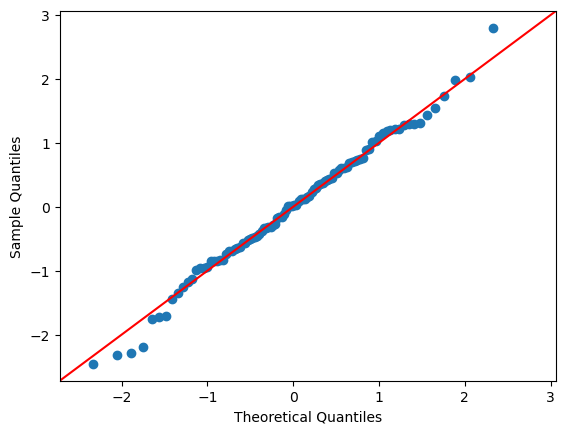

In [27]:
#Q-Q grafiği, modelin kalanlarının normal dağılıma ne kadar uyduğunu değerlendirir.
#"45" çizgisi, kalanların normal dağılıma uygunluğunu gösterir. Veriler bu çizgiye yakınsa, kalanlar normal dağılıma uygun demektir.
qqplot(model.resid,fit=True,line="45")
plt.show()

In [28]:
#Studentized residuals, her bir kalan değerinin varyansını normalize eder ve modelin uyumunu değerlendirir.
#Yüksek studentized residuals değerleri aykırı değerler veya modelin uyumsuzluğunu gösterebilir.
studentized_residuals = influence.resid_studentized_internal
print("Studentized residuals:\n", studentized_residuals)

Studentized residuals:
 [ 0.35399483  1.01408367  2.78710988 -0.15299846  0.69789284  0.60029821
  0.02054285 -0.57177442 -0.3285653   0.68683399  0.71908184  0.15936676
  0.00995742  1.29687958  0.62111318  0.88254038 -1.43910838  0.0298791
  1.2233338  -0.48205145  1.97816398 -0.72514762  0.89987583  0.37225509
  0.27359793  1.53753591 -0.3161467   0.73142299 -0.82338964 -0.52647696
  1.21823783  0.13011731 -1.34119754 -0.27403808  1.28516433 -0.11913848
  1.72705542 -0.96383852 -1.25267942 -0.95546997  0.76271897  0.12556014
 -0.56619742  0.00525752 -0.87232859 -0.65547051 -0.05676422 -0.37263715
 -0.98478378  1.03083492 -2.30242109 -0.16216104 -0.82862214 -0.62628057
  0.2937107   1.10809253 -1.69577141  1.18568412 -0.84278623 -0.29252536
 -0.45019209  0.41063004 -0.42722264  1.19369451 -2.27248205  0.52863803
  0.22648582 -0.31370064  2.0140478  -0.68856727 -1.1860267   1.43036002
 -0.33285177  0.14713639  1.17438482 -1.74896667  0.00935792 -0.66850771
  0.60978802  0.43068622  0.

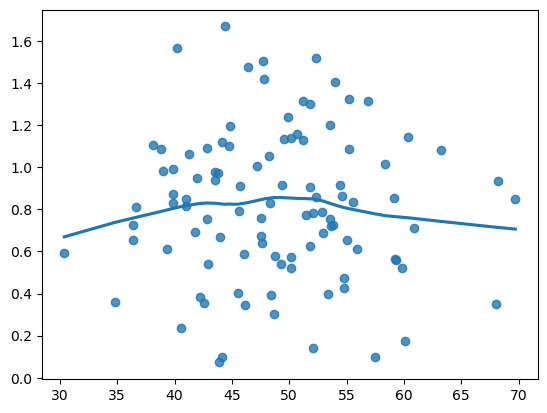

In [29]:
sqrt_standart=np.sqrt(np.abs(studentized_residuals))
#Studentized residuals değerlerinin mutlak değerlerinin karekökünü alır. Bu, residuals'ın büyüklüğünü görselleştirmede yardımcı olabilir.
sns.regplot(x=model.fittedvalues,y=sqrt_standart,ci=None,lowess=True)
plt.show()

<AxesSubplot:>

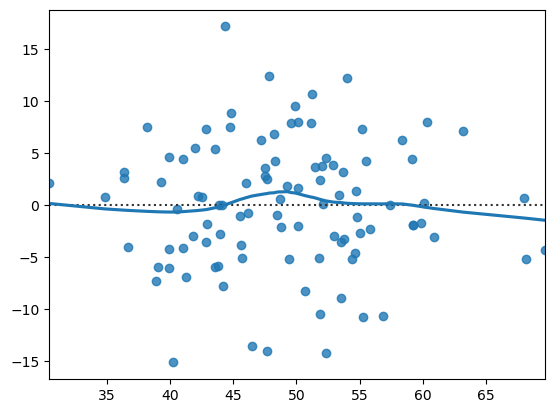

In [30]:
#Kalan grafiği çizer. Bu, tahmin edilen değerler ile kalanlar arasındaki ilişkiyi gösterir ve modelin doğruluğunu değerlendirmede yardımcı olabilir.
sns.residplot(x=model.fittedvalues,y=model.resid,lowess=True)

In [31]:
#Modelin etkilerine dair özet tabloyu oluşturur. Bu tablo, çeşitli etkili ölçümleri topluca görmenizi sağlar.
summary_influence=model.get_influence().summary_frame()
print(summary_influence)

    dfb_Intercept     dfb_B   cooks_d  standard_resid  hat_diag  \
0        0.096381 -0.090519  0.004808        0.353995  0.071273   
1        0.046391 -0.024345  0.005493        1.014084  0.010570   
2        0.238779 -0.178591  0.054217        2.787110  0.013767   
3       -0.004469  0.001097  0.000119       -0.152998  0.010051   
4       -0.044281  0.061420  0.004375        0.697893  0.017649   
..            ...       ...       ...             ...       ...   
95       0.013998 -0.025148  0.001449       -0.472387  0.012820   
96       0.002362 -0.000343  0.000042        0.091267  0.010014   
97       0.038338 -0.056352  0.004401       -0.743221  0.015685   
98       0.021002 -0.013632  0.000701        0.346611  0.011543   
99      -0.347200  0.297769  0.073071       -2.462569  0.023532   

    dffits_internal  student_resid    dffits  
0          0.098065       0.352409  0.097626  
1          0.104814       1.014232  0.104830  
2          0.329292       2.889746  0.341419  
3      

dfb_Intercept:

Açıklama: Modelin intercept (sabit) terimi üzerindeki etkisini ölçen DFBETA değeridir.
Yorumlama: Bu değer, belirli bir gözlemin intercept üzerindeki etkisini gösterir. Yüksek bir değer, bu gözlemin intercept'in tahmini üzerinde önemli bir etkisi olduğunu gösterebilir.
dfb_B:

Açıklama: Modelin bağımsız değişken (regresyon katsayıları) üzerindeki etkisini ölçen DFBETA değeridir.
Yorumlama: Bu değer, belirli bir gözlemin bağımsız değişkenin katsayıları üzerindeki etkisini gösterir. Yüksek bir DFBETA değeri, bu gözlemin modelin katsayıları üzerindeki etkisini gösterir ve etkili gözlemleri belirlemenize yardımcı olabilir.
cooks_d:

Açıklama: Cook's Distance, her bir gözlemin model parametreleri üzerindeki etkisini ölçer.
Yorumlama: Yüksek Cook's Distance değeri, gözlemin model üzerindeki etkisinin büyük olduğunu ve potansiyel bir aykırı değer olabileceğini gösterir. Genellikle, Cook's Distance değeri 1'den büyük olan gözlemler dikkatlice incelenmelidir.
standard_resid:

Açıklama: Standartize edilmiş kalanlar, her bir gözlemin kalanını standart hata ile normalize eder.
Yorumlama: Standartize edilmiş kalanlar, modelin uygunluğunu değerlendirmede yardımcı olur. Genellikle, bu değerlerin mutlak değerleri 2'yi geçiyorsa, aykırı değerler olarak değerlendirilebilir.
hat_diag:

Açıklama: Leverage değerlerini temsil eder. Hat matrisinin diyagonal elemanlarını içerir.
Yorumlama: Leverage, her bir gözlemin model tahminlerini ne kadar etkilediğini gösterir. Yüksek leverage değeri, gözlemin tahminler üzerindeki etkisini gösterir ve potansiyel etkili gözlemleri belirlemenize yardımcı olabilir.
dffits_internal:

Açıklama: Her bir gözlemin modelin tahminlerini ne kadar etkilediğini ölçen DFFITS değeridir. İçsel DFFITS değeri olarak da bilinir.
Yorumlama: Yüksek DFFITS değeri, gözlemin tahmin edilen değerler üzerindeki etkisinin büyük olduğunu ve potansiyel bir aykırı değer olabileceğini gösterir.
student_resid:

Açıklama: Studentized residuals, her bir kalan değerinin varyansını normalize eder.
Yorumlama: Bu değerler, modelin uyumunu değerlendirir. Yüksek studentized residuals değerleri, potansiyel aykırı değerler veya modelin uyumsuzluğunu gösterebilir. Genellikle, mutlak değerlerin 2'yi aşması, dikkat edilmesi gereken aykırı gözlemler olduğunu işaret edebilir.
dffits:

Açıklama: Her bir gözlemin model tahminlerine etkisini ölçen DFFITS değeridir. Bu, tahminlerin gözlemden ne kadar etkilendiğini gösterir.
Yorumlama: Yüksek DFFITS değerleri, modelin tahminlerini etkileyen gözlemleri belirlemek için kullanılır. Aykırı veya etkili gözlemler olarak işaretlenebilir.

In [32]:
#normal tabloya leverage ekle
simple_df["leverage"]=summary_influence["hat_diag"]

In [33]:
simple_df["cooks_d"]=summary_influence["cooks_d"]
#normal tabloya cooks_d ekle

In [34]:
print(simple_df)

            A          B          C    D  leverage   cooks_d
0   32.502345  31.707006  87.557221  158  0.071273  0.004808
1   53.426804  68.777596  53.152523   82  0.010570  0.005493
2   61.530358  62.562382  49.983669   75  0.013767  0.054217
3   47.475640  71.546632  84.841061  152  0.010051  0.000119
4   59.813208  87.230925  44.551348   63  0.017649  0.004375
..        ...        ...        ...  ...       ...       ...
95  50.030174  81.536991  78.050660  137  0.012820  0.001449
96  49.239765  72.111832  82.124900  146  0.010014  0.000042
97  50.039576  85.232007  54.057910   84  0.015685  0.004401
98  48.149859  66.224958  42.740575   59  0.011543  0.000701
99  25.128485  53.454394  40.024414   53  0.023532  0.073071

[100 rows x 6 columns]


In [35]:
print(simple_df.sort_values("cooks_d",ascending=False))

            A           B          C    D  leverage       cooks_d
99  25.128485   53.454394  40.024414   53  0.023532  7.307054e-02
2   61.530358   62.562382  49.983669   75  0.013767  5.421674e-02
74  70.346076  104.257102  56.774070   90  0.046169  3.337885e-02
50  38.119824   80.166275  52.247136   80  0.012010  3.222076e-02
93  46.230966   90.123572  57.226763   91  0.021006  3.196515e-02
..        ...         ...        ...  ...       ...           ...
17  60.297327   97.379897  63.564471  105  0.032109  1.480812e-05
6   52.211797   79.641973  73.523726  127  0.011737  2.505867e-06
76  57.504533   91.486778  72.165646  124  0.022799  1.021573e-06
12  44.164049   62.008923  74.881806  130  0.014188  7.134889e-07
43  43.870613   61.424710  51.794443   79  0.014657  2.055769e-07

[100 rows x 6 columns]


In [36]:
print(simple_df["cooks_d"].mean())

0.008633907904553451


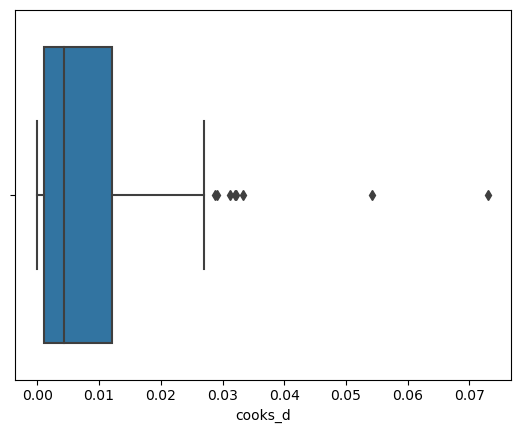

In [37]:
sns.boxplot(data=simple_df,x="cooks_d")
plt.show()

In [120]:
mean_cooks_d = np.mean(simple_df["cooks_d"])
std_cooks_d = np.std(simple_df["cooks_d"])

In [135]:
tresh=mean_cooks_d + 2 * std_cooks_d

In [136]:
print(tresh)

0.03253899696022884


In [139]:
new_df=simple_df[simple_df["cooks_d"]< 0.01]

In [140]:
print(new_df.sort_values("cooks_d",ascending=False))

            A          B          C    D  leverage       cooks_d
30  52.223996  63.358790  69.902179  119  0.013200  9.926212e-03
32  42.436477  76.617341  75.334499  131  0.010549  9.588649e-03
83  59.049741  77.634183  39.119028   51  0.010874  8.944912e-03
13  58.168471  75.392870  59.037537   95  0.010257  8.715112e-03
34  57.504448  74.084130  45.909429   66  0.010066  8.397479e-03
..        ...        ...        ...  ...       ...           ...
17  60.297327  97.379897  63.564471  105  0.032109  1.480812e-05
6   52.211797  79.641973  73.523726  127  0.011737  2.505867e-06
76  57.504533  91.486778  72.165646  124  0.022799  1.021573e-06
12  44.164049  62.008923  74.881806  130  0.014188  7.134889e-07
43  43.870613  61.424710  51.794443   79  0.014657  2.055769e-07

[73 rows x 6 columns]


In [123]:
new_simple_df=new_df[["A","B"]]

In [124]:
print(new_simple_df)

            A          B
0   32.502345  31.707006
1   53.426804  68.777596
3   47.475640  71.546632
4   59.813208  87.230925
5   55.142188  78.211518
..        ...        ...
94  68.319361  97.919821
95  50.030174  81.536991
96  49.239765  72.111832
97  50.039576  85.232007
98  48.149859  66.224958

[97 rows x 2 columns]


In [141]:
model_new=ols("A ~ B",data=new_simple_df).fit()

In [142]:
print(model_new.summary())

                            OLS Regression Results                            
Dep. Variable:                      A   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                     149.4
Date:                Thu, 05 Sep 2024   Prob (F-statistic):           3.34e-21
Time:                        13:28:25   Log-Likelihood:                -307.13
No. Observations:                  97   AIC:                             618.3
Df Residuals:                      95   BIC:                             623.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     16.8904      2.681      6.301      0.0

In [143]:
print(new_simple_df["A"].corr(new_simple_df["B"]))

0.7818436346142527


In [144]:
new_simple_df.head()

,A,B,leverage,cooks_d
0,32.502345,31.707006,0.074977,0.003651
1,53.426804,68.777596,0.010905,0.006584
3,47.475640,71.546632,0.010362,0.000118
4,59.813208,87.230925,0.018414,0.005954
5,55.142188,78.211518,0.011472,0.002616


In [147]:
new_influence=model_new.get_influence().summary_frame()

In [148]:
print(new_influence)

    dfb_Intercept     dfb_B   cooks_d  standard_resid  hat_diag  \
0        0.083976 -0.078978  0.003651        0.300145  0.074977   
1        0.050728 -0.026850  0.006584        1.092825  0.010905   
3       -0.004404  0.001085  0.000118       -0.149972  0.010362   
4       -0.052589  0.072256  0.005954        0.796725  0.018414   
5       -0.007378  0.022957  0.002616        0.671435  0.011472   
..            ...       ...       ...             ...       ...   
94      -0.196236  0.235610  0.038978        1.471679  0.034743   
95       0.014614 -0.025732  0.001483       -0.469082  0.013303   
96       0.002925 -0.000421  0.000066        0.112738  0.010323   
97       0.040340 -0.058612  0.004678       -0.750556  0.016336   
98       0.022974 -0.015017  0.000838        0.372657  0.011928   

    dffits_internal  student_resid    dffits  
0          0.085451       0.298703  0.085041  
1          0.114748       1.093956  0.114867  
3         -0.015346      -0.149199 -0.015267  
4      

In [149]:
#new tabloya leverage ekle
new_simple_df["leverage"]=new_influence["hat_diag"]
new_simple_df["cooks_d"]=new_influence["cooks_d"]
#new tabloya cooks_d ekle

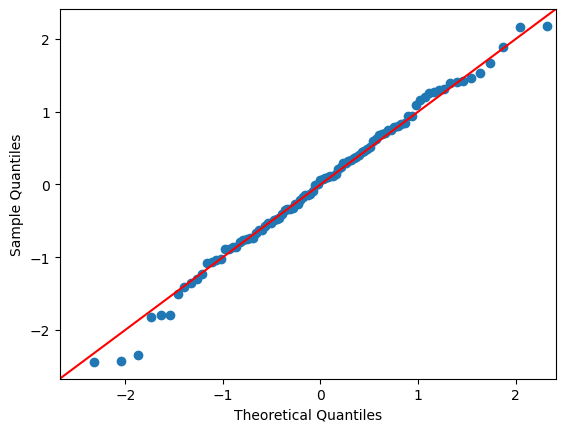

In [150]:
qqplot(model_new.resid,fit=True,line="45")
plt.show()

In [151]:
print(new_simple_df.sort_values("cooks_d",ascending=False))

            A          B  leverage       cooks_d
94  68.319361  97.919821  0.034743  3.897786e-02
50  38.119824  80.166275  0.012445  3.723538e-02
93  46.230966  90.123572  0.021966  3.604762e-02
20  66.189817  83.878565  0.015103  3.575088e-02
90  32.940480  67.170656  0.011491  3.175134e-02
..        ...        ...       ...           ...
96  49.239765  72.111832  0.010323  6.628741e-05
76  57.504533  91.486778  0.023863  5.908373e-05
6   52.211797  79.641973  0.012155  1.806841e-05
43  43.870613  61.424710  0.015210  1.016183e-07
12  44.164049  62.008923  0.014716  5.591483e-08

[97 rows x 4 columns]


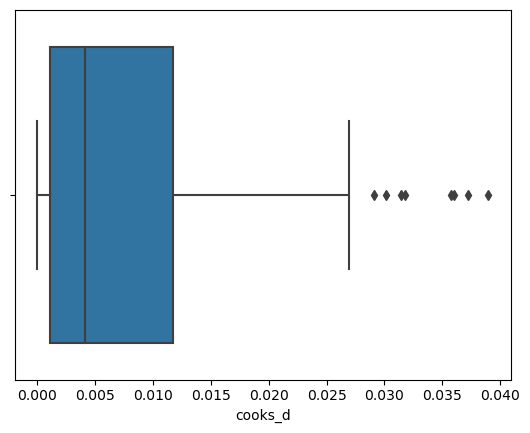

In [152]:
sns.boxplot(data=new_simple_df,x="cooks_d")
plt.show()

In [155]:
deneme1=model_new.predict(k)

In [156]:
print(deneme,deneme1)

0    25.538226
dtype: float64 0    26.121611
dtype: float64
